# 🏆 Rankings e Comparações - Reclame Aqui

**Objetivo:** Análise focada em rankings de empresas e comparações entre categorias

**Foco:**
- 🥇 Rankings detalhados por categoria
- 📊 Comparações cross-categoria
- 🎯 Identificação de padrões
- 📈 Métricas de performance

---

## 📦 Setup

In [1]:
# Imports e configurações
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

from utils_notebook import NotebookHelper

# Setup
helper = NotebookHelper(verbose=False)
helper.configurar_plots(figsize=(14, 8))
%matplotlib inline

print("🚀 Setup concluído!")

Bucket 'reclameaqui-landing' já existe.
Bucket 'reclameaqui-raw' já existe.
Bucket 'reclameaqui-trusted' já existe.
Bucket 'reclameaqui-landing' já existe.
Bucket 'reclameaqui-raw' já existe.
Bucket 'reclameaqui-trusted' já existe.
🚀 Setup concluído!


## 📥 Carregamento e Preparação dos Dados

In [2]:
# Carregar dados
dados = helper.carregar_dados_basicos()

# Separar rankings
rankings = {k: v for k, v in dados.items() if k.startswith('ranking_')}

print(f"📊 Rankings disponíveis: {len(rankings)}")
for nome in rankings.keys():
    categoria = nome.replace('ranking_', '').replace('_', ' → ').title()
    print(f"   🏷️  {categoria}")

if len(rankings) == 0:
    print("\n⚠️  Nenhum ranking encontrado!")
    print("💡 Execute: python top_empresas.py --main-segment bancos-e-financeiras --secondary-segment bancos-digitais")
    print("💡 Ou: python runner.py categoria --main-segment varejo --secondary-segment marketplaces")

📥 Carregando dados disponíveis...
✅ Categorias: 339 subcategorias
✅ Categorias com ranking: 1
✅ Bancos e Financeiras / Meios de pagamento eletrônico: 10 empresas

📊 Total de datasets carregados: 3
📊 Rankings disponíveis: 1
   🏷️  Bancos-E-Financeiras → Meios-De-Pagamento-Eletronico


In [3]:
# Análise inicial dos rankings
if len(rankings) > 0:
    print("🔍 ANÁLISE DOS RANKINGS DISPONÍVEIS")
    print("=" * 50)
    
    for nome, df in rankings.items():
        categoria = nome.replace('ranking_', '').replace('_', ' / ').title()
        
        print(f"\n📋 {categoria}")
        print(f"   Empresas: {len(df)}")
        
        if 'finalScore' in df.columns:
            print(f"   Score médio: {df['finalScore'].mean():.2f}")
            print(f"   Score range: {df['finalScore'].min():.1f} - {df['finalScore'].max():.1f}")
        
        if 'isVerified' in df.columns:
            pct_verificadas = df['isVerified'].mean() * 100
            print(f"   Verificadas: {pct_verificadas:.0f}%")
        
        # Mostrar top 3
        if 'finalScore' in df.columns and len(df) >= 3:
            top3 = df.nlargest(3, 'finalScore')
            print("   Top 3:")
            for i, (_, empresa) in enumerate(top3.iterrows(), 1):
                print(f"     {i}. {empresa['companyName']} ({empresa['finalScore']:.1f})")
else:
    print("❌ Nenhum ranking para analisar")

🔍 ANÁLISE DOS RANKINGS DISPONÍVEIS

📋 Bancos-E-Financeiras / Meios-De-Pagamento-Eletronico
   Empresas: 10
   Score médio: 9.44
   Score range: 9.2 - 9.7
   Verificadas: 100%
   Top 3:
     1. Paag Tecnologia S.A (9.7)
     2. Gringo  (9.6)
     3. SuitPay (9.6)


## 🥇 Rankings Detalhados por Categoria

📊 Criando análise para: Bancos-E-Financeiras / Meios-De-Pagamento-Eletronico


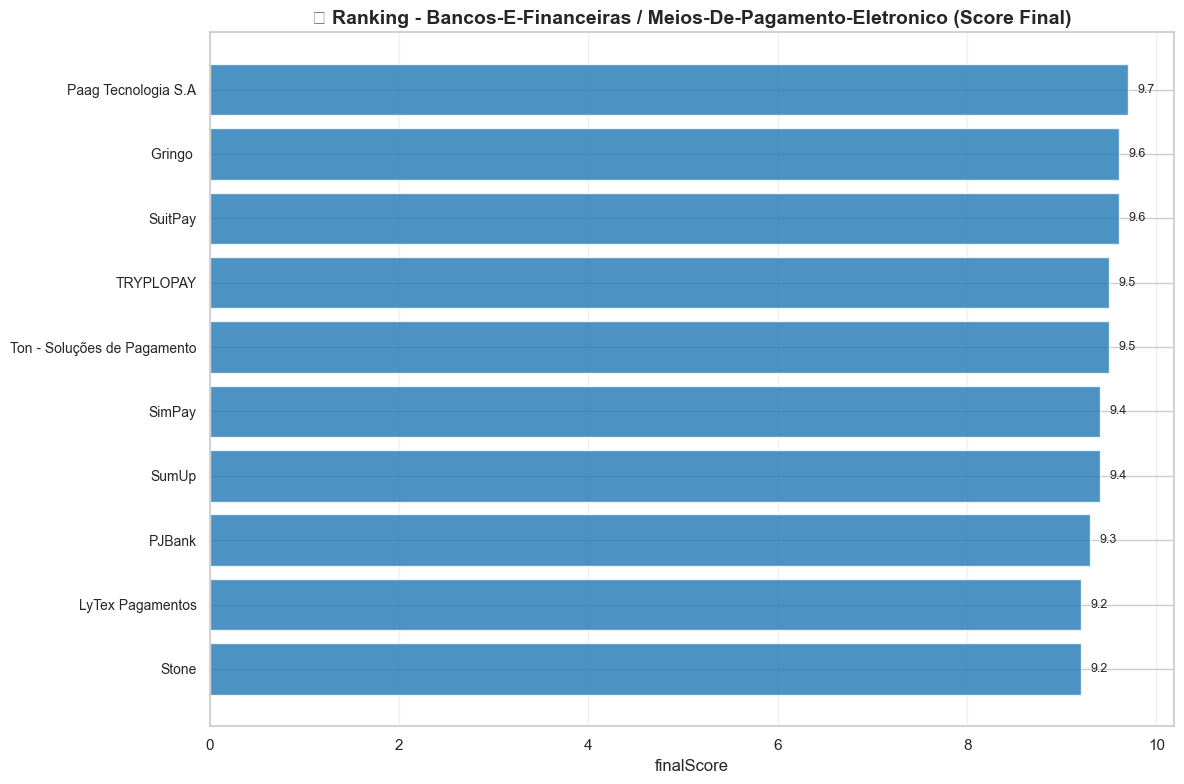

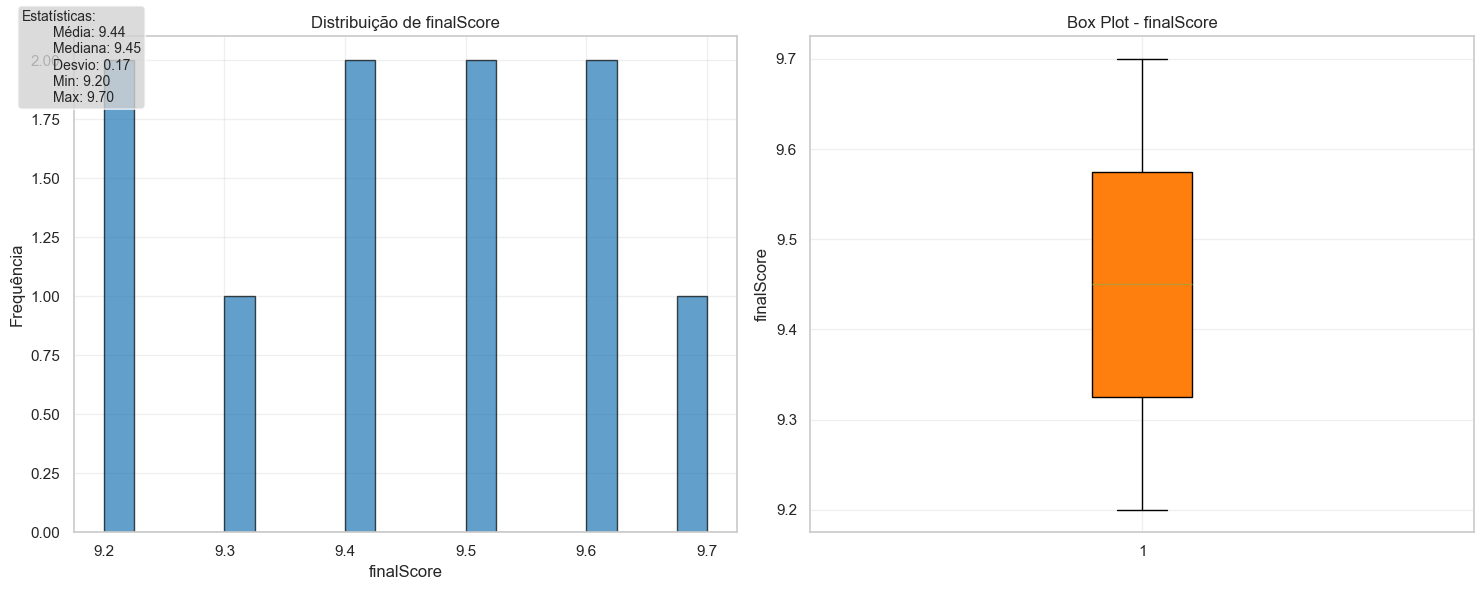


------------------------------------------------------------



In [4]:
# Criar visualizações para cada ranking
if len(rankings) > 0:
    for nome, df in rankings.items():
        categoria = nome.replace('ranking_', '').replace('_', ' / ').title()
        
        print(f"📊 Criando análise para: {categoria}")
        
        if len(df) > 0 and 'finalScore' in df.columns:
            # Gráfico de ranking
            fig = helper.plot_top_empresas(
                df, 
                'finalScore',
                f'🏆 Ranking - {categoria} (Score Final)',
                min(10, len(df))
            )
            plt.show()
            
            # Se tiver mais de 5 empresas, mostrar distribuição
            if len(df) > 5:
                fig2 = helper.plot_distribuicao_scores(df, 'finalScore')
                plt.show()
        else:
            print(f"   ⚠️  Dados insuficientes para {categoria}")
        
        print("\n" + "-"*60 + "\n")
else:
    print("❌ Nenhum ranking disponível para visualização")

## 📊 Comparação Cross-Categoria

In [5]:
# Preparar dados para comparação
if len(rankings) > 1:
    print("🔍 COMPARAÇÃO ENTRE CATEGORIAS")
    print("=" * 50)
    
    # Estatísticas por categoria
    comparacao = []
    
    for nome, df in rankings.items():
        categoria_limpa = nome.replace('ranking_', '').replace('_', ' / ')
        
        if 'finalScore' in df.columns and len(df) > 0:
            stats = {
                'categoria': categoria_limpa,
                'total_empresas': len(df),
                'score_medio': df['finalScore'].mean(),
                'score_mediano': df['finalScore'].median(),
                'score_min': df['finalScore'].min(),
                'score_max': df['finalScore'].max(),
                'score_std': df['finalScore'].std()
            }
            
            # Adicionar outras métricas se disponíveis
            if 'solvedPercentual' in df.columns:
                stats['taxa_resolucao_media'] = df['solvedPercentual'].mean()
            
            if 'isVerified' in df.columns:
                stats['pct_verificadas'] = df['isVerified'].mean() * 100
            
            if 'complainsCount' in df.columns:
                stats['total_reclamacoes'] = df['complainsCount'].sum()
                stats['media_reclamacoes'] = df['complainsCount'].mean()
            
            comparacao.append(stats)
    
    if len(comparacao) > 1:
        df_comparacao = pd.DataFrame(comparacao)
        
        # Mostrar tabela de comparação
        print("📋 TABELA DE COMPARAÇÃO:")
        display(df_comparacao.round(2))
        
        # Identificar categoria com melhor performance
        melhor_categoria = df_comparacao.loc[df_comparacao['score_medio'].idxmax()]
        print(f"\n🏆 Categoria com melhor score médio: {melhor_categoria['categoria']} ({melhor_categoria['score_medio']:.2f})")
        
        if 'taxa_resolucao_media' in df_comparacao.columns:
            melhor_resolucao = df_comparacao.loc[df_comparacao['taxa_resolucao_media'].idxmax()]
            print(f"🎯 Categoria com melhor taxa de resolução: {melhor_resolucao['categoria']} ({melhor_resolucao['taxa_resolucao_media']:.1f}%)")
    
    else:
        print("⚠️  Apenas uma categoria disponível para comparação")

elif len(rankings) == 1:
    print("⚠️  Apenas uma categoria disponível - não é possível fazer comparação")
    print("💡 Colete mais categorias para comparações interessantes!")
else:
    print("❌ Nenhuma categoria disponível")

⚠️  Apenas uma categoria disponível - não é possível fazer comparação
💡 Colete mais categorias para comparações interessantes!


In [6]:
# Visualização da comparação
if len(rankings) > 1 and 'df_comparacao' in locals():
    # Gráfico de barras comparativo
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('📊 Comparação Entre Categorias', fontsize=16, fontweight='bold')
    
    # 1. Score médio
    axes[0,0].bar(range(len(df_comparacao)), df_comparacao['score_medio'], 
                  color=helper.cores_primarias[0], alpha=0.8)
    axes[0,0].set_xticks(range(len(df_comparacao)))
    axes[0,0].set_xticklabels([cat[:15] + '...' if len(cat) > 15 else cat for cat in df_comparacao['categoria']], 
                              rotation=45, ha='right')
    axes[0,0].set_title('Score Médio por Categoria')
    axes[0,0].set_ylabel('Score Médio')
    axes[0,0].grid(axis='y', alpha=0.3)
    
    # 2. Número de empresas
    axes[0,1].bar(range(len(df_comparacao)), df_comparacao['total_empresas'], 
                  color=helper.cores_primarias[1], alpha=0.8)
    axes[0,1].set_xticks(range(len(df_comparacao)))
    axes[0,1].set_xticklabels([cat[:15] + '...' if len(cat) > 15 else cat for cat in df_comparacao['categoria']], 
                              rotation=45, ha='right')
    axes[0,1].set_title('Número de Empresas por Categoria')
    axes[0,1].set_ylabel('Total de Empresas')
    axes[0,1].grid(axis='y', alpha=0.3)
    
    # 3. Taxa de resolução (se disponível)
    if 'taxa_resolucao_media' in df_comparacao.columns:
        axes[1,0].bar(range(len(df_comparacao)), df_comparacao['taxa_resolucao_media'], 
                      color=helper.cores_primarias[2], alpha=0.8)
        axes[1,0].set_title('Taxa de Resolução Média (%)')
        axes[1,0].set_ylabel('Taxa de Resolução (%)')
    else:
        axes[1,0].text(0.5, 0.5, 'Taxa de Resolução\nNão Disponível', 
                       transform=axes[1,0].transAxes, ha='center', va='center', fontsize=12)
        axes[1,0].set_title('Taxa de Resolução Média')
    
    axes[1,0].set_xticks(range(len(df_comparacao)))
    axes[1,0].set_xticklabels([cat[:15] + '...' if len(cat) > 15 else cat for cat in df_comparacao['categoria']], 
                              rotation=45, ha='right')
    axes[1,0].grid(axis='y', alpha=0.3)
    
    # 4. Variabilidade (desvio padrão)
    axes[1,1].bar(range(len(df_comparacao)), df_comparacao['score_std'], 
                  color=helper.cores_primarias[3], alpha=0.8)
    axes[1,1].set_xticks(range(len(df_comparacao)))
    axes[1,1].set_xticklabels([cat[:15] + '...' if len(cat) > 15 else cat for cat in df_comparacao['categoria']], 
                              rotation=45, ha='right')
    axes[1,1].set_title('Variabilidade dos Scores (Desvio Padrão)')
    axes[1,1].set_ylabel('Desvio Padrão')
    axes[1,1].grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()

else:
    print("❌ Comparação visual não disponível")

❌ Comparação visual não disponível


## 🎯 Análise de Padrões e Insights

In [7]:
# Análise de padrões
if len(rankings) > 0:
    print("🔍 ANÁLISE DE PADRÕES E INSIGHTS")
    print("=" * 50)
    
    # 1. Consolidar todas as empresas
    todas_empresas = []
    for nome, df in rankings.items():
        df_temp = df.copy()
        df_temp['categoria'] = nome.replace('ranking_', '').replace('_', ' / ')
        todas_empresas.append(df_temp)
    
    df_consolidado = pd.concat(todas_empresas, ignore_index=True)
    
    print(f"📊 Total de empresas analisadas: {len(df_consolidado)}")
    print(f"📊 Categorias analisadas: {df_consolidado['categoria'].nunique()}")
    
    # 2. Análises gerais
    if 'finalScore' in df_consolidado.columns:
        print(f"\n🎯 SCORES GERAIS:")
        print(f"   Score médio geral: {df_consolidado['finalScore'].mean():.2f}")
        print(f"   Score mediano: {df_consolidado['finalScore'].median():.2f}")
        print(f"   Range de scores: {df_consolidado['finalScore'].min():.1f} - {df_consolidado['finalScore'].max():.1f}")
        
        # Top 5 empresas cross-categoria
        print(f"\n🏆 TOP 5 EMPRESAS (TODAS AS CATEGORIAS):")
        top5_geral = df_consolidado.nlargest(5, 'finalScore')
        for i, (_, empresa) in enumerate(top5_geral.iterrows(), 1):
            print(f"{i}. {empresa['companyName']} ({empresa['categoria']}) - {empresa['finalScore']:.1f}")
    
    # 3. Análise de verificação
    if 'isVerified' in df_consolidado.columns:
        pct_verificadas_geral = df_consolidado['isVerified'].mean() * 100
        print(f"\n✅ VERIFICAÇÃO:")
        print(f"   Empresas verificadas (geral): {pct_verificadas_geral:.1f}%")
        
        # Comparar scores de verificadas vs não verificadas
        if df_consolidado['isVerified'].nunique() > 1:  # Se há empresas verificadas e não verificadas
            score_verificadas = df_consolidado[df_consolidado['isVerified']]['finalScore'].mean()
            score_nao_verificadas = df_consolidado[~df_consolidado['isVerified']]['finalScore'].mean()
            print(f"   Score médio verificadas: {score_verificadas:.2f}")
            print(f"   Score médio não verificadas: {score_nao_verificadas:.2f}")
            print(f"   Diferença: {score_verificadas - score_nao_verificadas:.2f} pontos")
    
    # 4. Análise de reclamações
    if 'complainsCount' in df_consolidado.columns:
        print(f"\n📝 RECLAMAÇÕES:")
        total_reclamacoes = df_consolidado['complainsCount'].sum()
        media_reclamacoes = df_consolidado['complainsCount'].mean()
        print(f"   Total de reclamações: {total_reclamacoes:,}")
        print(f"   Média por empresa: {media_reclamacoes:.0f}")
        
        # Correlação score vs reclamações
        if 'finalScore' in df_consolidado.columns:
            corr_score_reclamacoes = df_consolidado['finalScore'].corr(df_consolidado['complainsCount'])
            print(f"   Correlação Score vs Reclamações: {corr_score_reclamacoes:.3f}")
            
            if corr_score_reclamacoes < -0.3:
                print("     💡 Correlação negativa: mais reclamações = menor score")
            elif corr_score_reclamacoes > 0.3:
                print("     💡 Correlação positiva: mais reclamações = maior score (volume de negócio?)")
            else:
                print("     💡 Pouca correlação entre score e volume de reclamações")

else:
    print("❌ Nenhum dado disponível para análise de padrões")

🔍 ANÁLISE DE PADRÕES E INSIGHTS
📊 Total de empresas analisadas: 10
📊 Categorias analisadas: 1

🎯 SCORES GERAIS:
   Score médio geral: 9.44
   Score mediano: 9.45
   Range de scores: 9.2 - 9.7

🏆 TOP 5 EMPRESAS (TODAS AS CATEGORIAS):
1. Paag Tecnologia S.A (bancos-e-financeiras / meios-de-pagamento-eletronico) - 9.7
2. Gringo  (bancos-e-financeiras / meios-de-pagamento-eletronico) - 9.6
3. SuitPay (bancos-e-financeiras / meios-de-pagamento-eletronico) - 9.6
4. TRYPLOPAY (bancos-e-financeiras / meios-de-pagamento-eletronico) - 9.5
5. Ton - Soluções de Pagamento (bancos-e-financeiras / meios-de-pagamento-eletronico) - 9.5

✅ VERIFICAÇÃO:
   Empresas verificadas (geral): 100.0%

📝 RECLAMAÇÕES:
   Total de reclamações: 13,597
   Média por empresa: 1360
   Correlação Score vs Reclamações: 0.049
     💡 Pouca correlação entre score e volume de reclamações


## 📈 Métricas de Performance

📈 MÉTRICAS DE PERFORMANCE DETALHADAS
🎯 DISTRIBUIÇÃO POR FAIXA DE PERFORMANCE:
   Regular (≤7.0): 0 empresas (0.0%)
   Boa (7.1-8.5): 0 empresas (0.0%)
   Ótima (8.6-9.0): 0 empresas (0.0%)
   Excelente (>9.0): 10 empresas (100.0%)


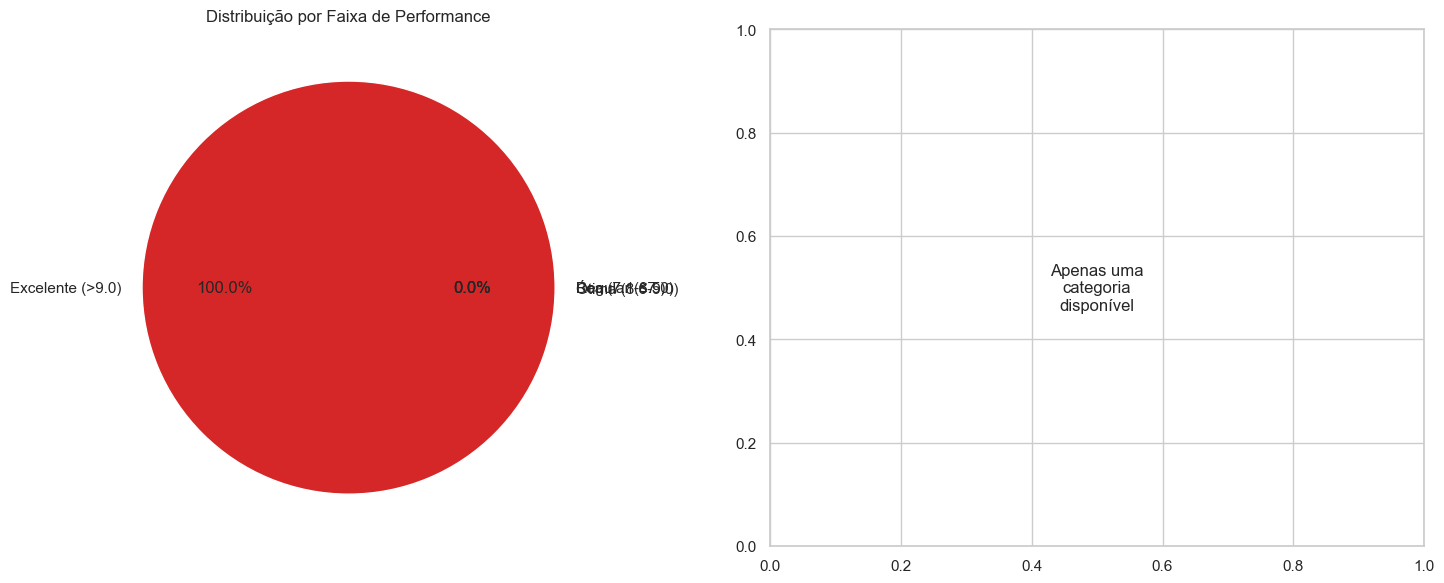


🌟 EMPRESAS BENCHMARK (Score > 9.0 E Resolução > 95%):
1. Paag Tecnologia S.A (bancos-e-financeiras / meios-de-pagamento-eletronico)
   Score: 9.7 | Resolução: 96.1%
2. Gringo  (bancos-e-financeiras / meios-de-pagamento-eletronico)
   Score: 9.6 | Resolução: 99.0%
3. SuitPay (bancos-e-financeiras / meios-de-pagamento-eletronico)
   Score: 9.6 | Resolução: 95.1%
4. TRYPLOPAY (bancos-e-financeiras / meios-de-pagamento-eletronico)
   Score: 9.5 | Resolução: 97.8%
5. Ton - Soluções de Pagamento (bancos-e-financeiras / meios-de-pagamento-eletronico)
   Score: 9.5 | Resolução: 97.3%
6. SimPay (bancos-e-financeiras / meios-de-pagamento-eletronico)
   Score: 9.4 | Resolução: 98.1%
7. SumUp (bancos-e-financeiras / meios-de-pagamento-eletronico)
   Score: 9.4 | Resolução: 97.7%
8. PJBank (bancos-e-financeiras / meios-de-pagamento-eletronico)
   Score: 9.3 | Resolução: 97.1%
9. LyTex Pagamentos (bancos-e-financeiras / meios-de-pagamento-eletronico)
   Score: 9.2 | Resolução: 100.0%
10. Stone (ban

In [9]:
# Métricas detalhadas de performance
if 'df_consolidado' in locals() and len(df_consolidado) > 0:
    print("📈 MÉTRICAS DE PERFORMANCE DETALHADAS")
    print("=" * 50)
    
    # Definir faixas de performance
    if 'finalScore' in df_consolidado.columns:
        df_consolidado['faixa_performance'] = pd.cut(
            df_consolidado['finalScore'], 
            bins=[0, 7.0, 8.5, 9.0, 10.0], 
            labels=['Regular (≤7.0)', 'Boa (7.1-8.5)', 'Ótima (8.6-9.0)', 'Excelente (>9.0)']
        )
        
        print("🎯 DISTRIBUIÇÃO POR FAIXA DE PERFORMANCE:")
        dist_performance = df_consolidado['faixa_performance'].value_counts().sort_index()
        for faixa, count in dist_performance.items():
            pct = (count / len(df_consolidado)) * 100
            print(f"   {faixa}: {count} empresas ({pct:.1f}%)")
        
        # Gráfico de distribuição de performance
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
        
        # Pizza
        ax1.pie(dist_performance.values, labels=dist_performance.index, autopct='%1.1f%%',
               colors=helper.cores_primarias)
        ax1.set_title('Distribuição por Faixa de Performance')
        
        # Barras por categoria
        if df_consolidado['categoria'].nunique() > 1:
            perf_por_categoria = pd.crosstab(df_consolidado['categoria'], df_consolidado['faixa_performance'])
            perf_por_categoria.plot(kind='bar', ax=ax2, color=helper.cores_primarias)
            ax2.set_title('Performance por Categoria')
            ax2.set_xlabel('Categoria')
            ax2.set_ylabel('Número de Empresas')
            ax2.legend(title='Faixa de Performance', bbox_to_anchor=(1.05, 1), loc='upper left')
            ax2.tick_params(axis='x', rotation=45)
        else:
            ax2.text(0.5, 0.5, 'Apenas uma\ncategoria\ndisponível', 
                    transform=ax2.transAxes, ha='center', va='center', fontsize=12)
        
        plt.tight_layout()
        plt.show()
    
    # Identificar empresas benchmark
    if 'finalScore' in df_consolidado.columns and 'solvedPercentual' in df_consolidado.columns:
        print("\n🌟 EMPRESAS BENCHMARK (Score > 9.0 E Resolução > 95%):")
        benchmark = df_consolidado[
            (df_consolidado['finalScore'] > 9.0) & 
            (df_consolidado['solvedPercentual'] > 95.0)
        ]
        
        if len(benchmark) > 0:
            for i, (_, empresa) in enumerate(benchmark.iterrows(), 1):
                print(f"{i}. {empresa['companyName']} ({empresa['categoria']})")
                print(f"   Score: {empresa['finalScore']:.1f} | Resolução: {empresa['solvedPercentual']:.1f}%")
        else:
            print("   Nenhuma empresa atende aos critérios de benchmark")
    
    # Empresas que precisam de atenção
    if 'finalScore' in df_consolidado.columns:
        print("\n⚠️  EMPRESAS QUE PRECISAM DE ATENÇÃO (Score < 8.0):")
        atencao = df_consolidado[df_consolidado['finalScore'] < 8.0]
        
        if len(atencao) > 0:
            for i, (_, empresa) in enumerate(atencao.iterrows(), 1):
                print(f"{i}. {empresa['companyName']} ({empresa['categoria']}) - Score: {empresa['finalScore']:.1f}")
        else:
            print("   ✅ Todas as empresas têm score ≥ 8.0")

else:
    print("❌ Dados insuficientes para métricas de performance")